In [39]:
import numpy as np
%matplotlib inline
import Corrfunc
import glob
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import nbodykit

import utils
import plotter
import bao_utils
from colors_labels import *

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
cosmo_b17 = bao_utils.get_cosmo('b17')
cosmo_patchy = bao_utils.get_cosmo('patchy')

z = 0.57
alpha_true = bao_utils.compute_alpha(z, cosmo_patchy, cosmo_b17)

0.260448 0.31000013381653335 0.04814257203879415 0.676 0.96 [0.06] 0.824 2.0328
0.258909 0.307115 0.048206 0.6777 0.9611 [] 0.8288000000000002 3.046
Truth: r_s: 151.67742739223243 D_A: 1386.2717028870238 Mpc H: 92.96723916119726 km / (Mpc s)
Fiducial: r_s: 151.63251902228856 D_A: 1388.2262919973946 Mpc H: 92.93687764109468 km / (Mpc s)
alpha: 0.998656590432877


(-0.002, 0.007)

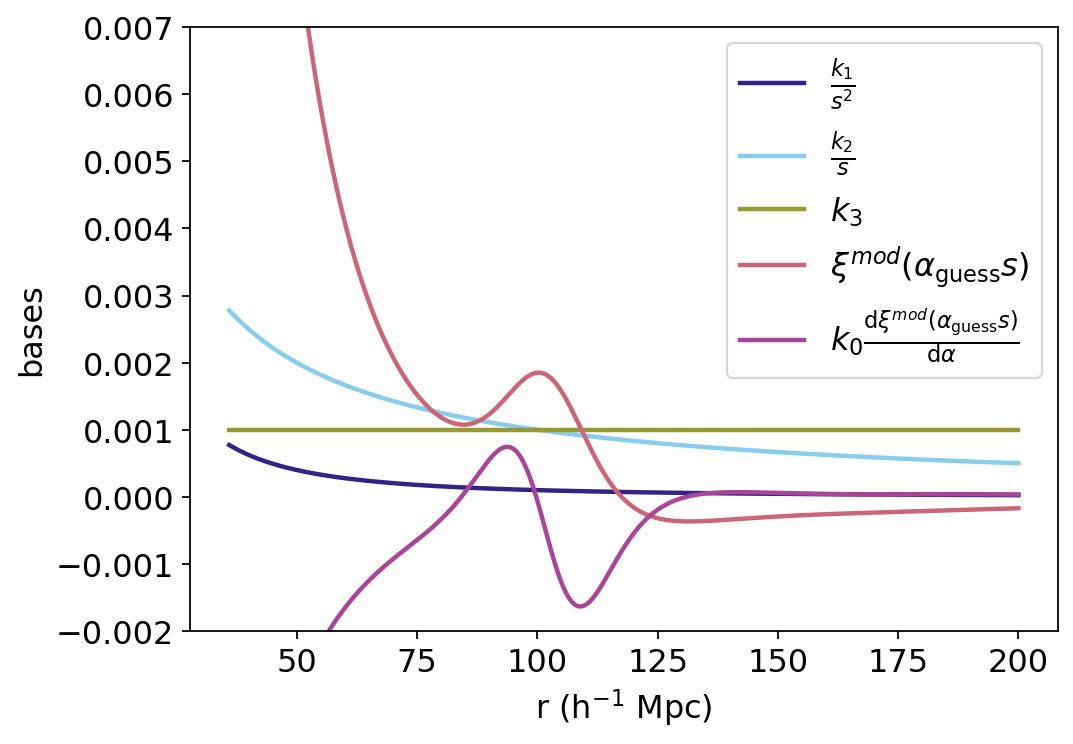

In [47]:
boxsize = 750
cat_tag = f'_L{boxsize}_n2e-4_z057_patchy'
proj = 'baoiter'
cosmo_name = 'b17'
cf_tag = f"_{proj}_cosmo{cosmo_name}_convtest"
redshift = 0.57
bias = 2.0

rmin=36.0
rmax=200.0

projfn_start = f"../tables/bases{cat_tag}{cf_tag}_r{rmin}-{rmax}_z{redshift}_bias{bias}.dat"
rescale_by = np.ones(5)
rescale_by[4] = 0.1
bases = np.loadtxt(projfn_start)
plotter.plot_bases(bases, base_colors, names=base_names, rescale_by=rescale_by)
plt.ylim(-0.002, 0.007)

Number converged: 999/1000
Tophat (18 components)
BAO (5 components)


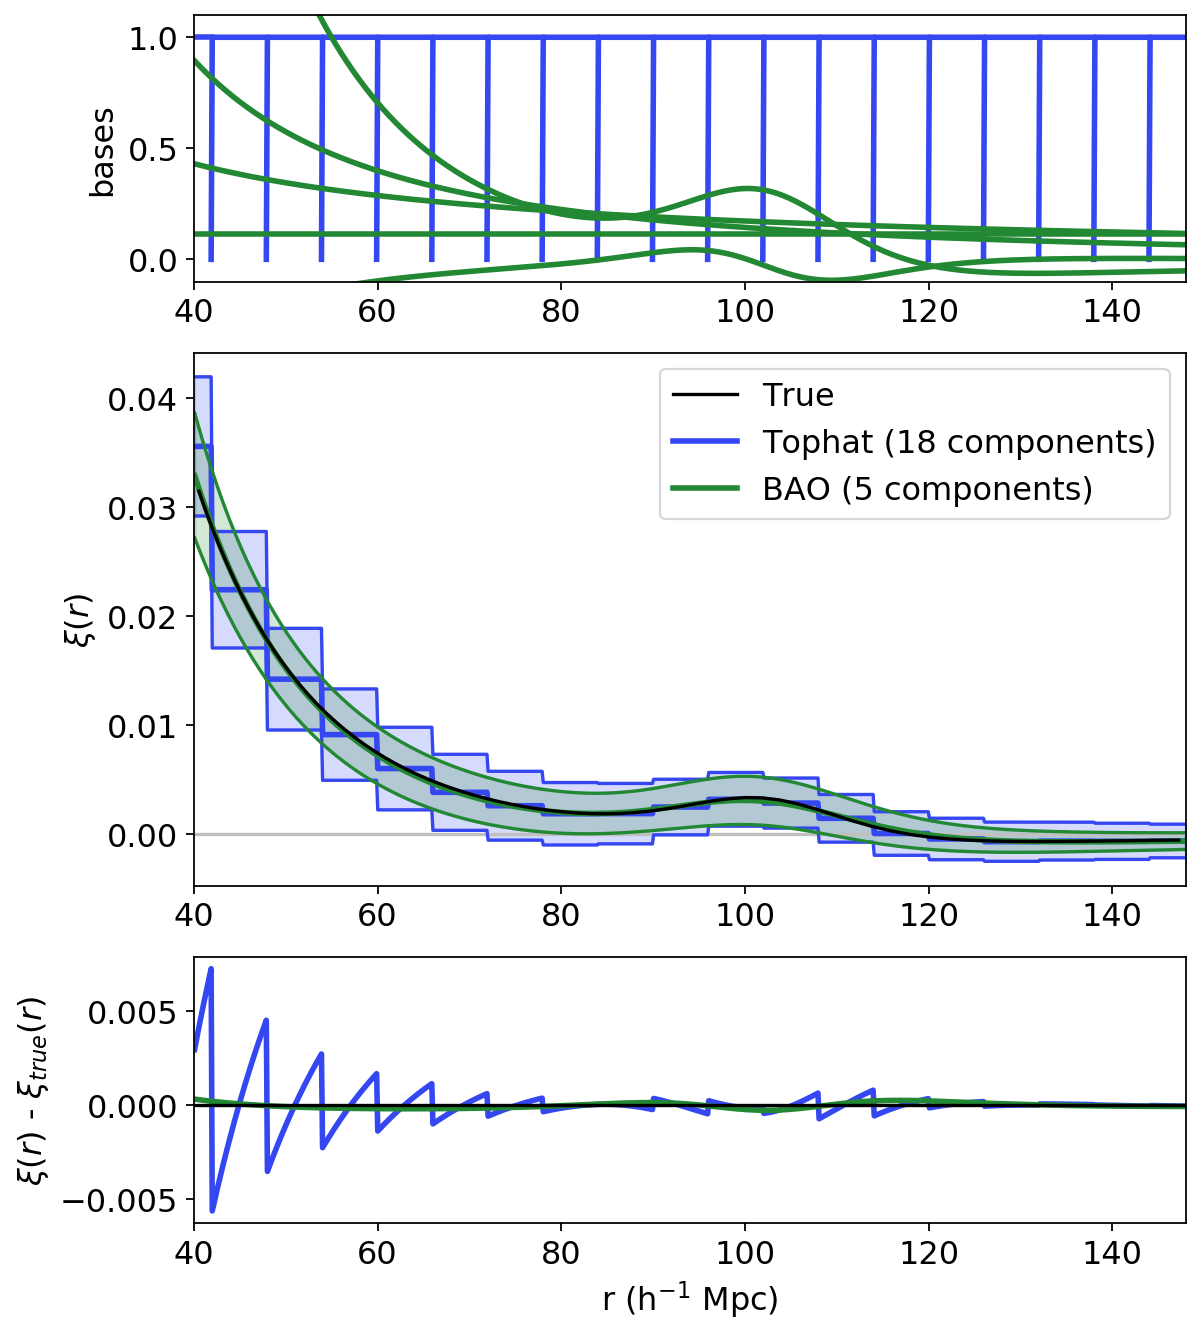

In [61]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tags = ['_tophat_bw6', '_baoiter_cosmob17_adaptive2']
colors = [ctopmid, cbao]
labels = ['Tophat (18 components)', 'BAO (5 components)']

ax = plotter.plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels, Nrealizations=1000, show_bases=True,
                    peak_fit=False) #True, bws=[6,2], r_widths=[15.,8.], r_max_true=r_max_true)

## Spline

Tophat (18 components)
Spline (9 components)


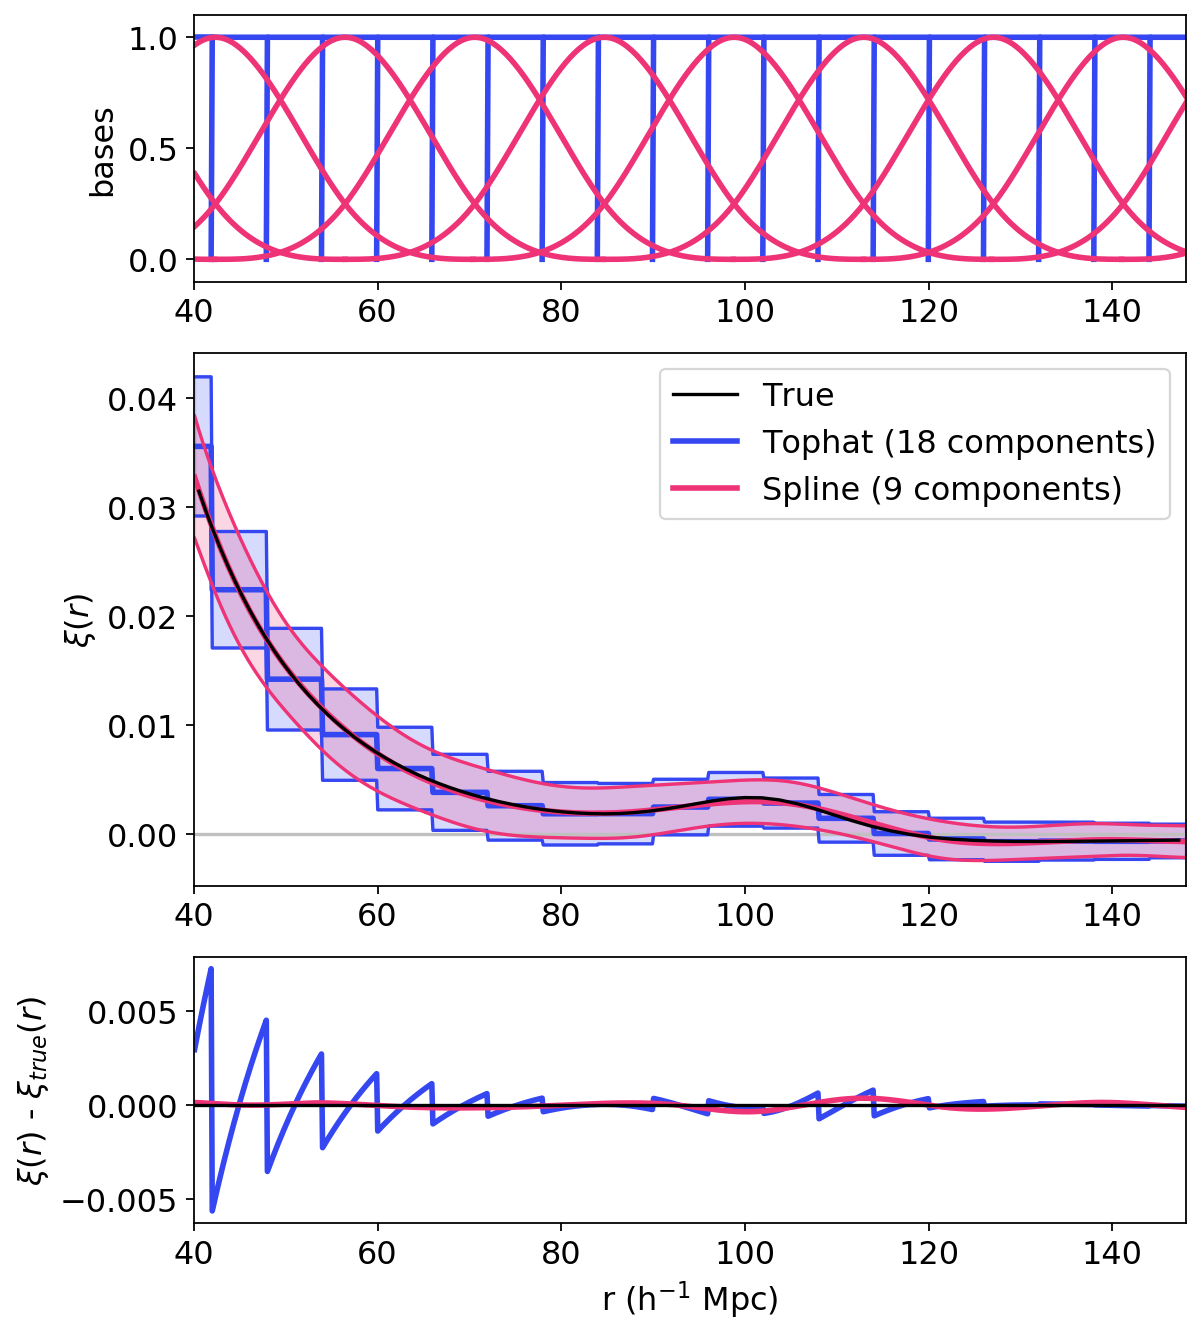

In [62]:
cat_tag = '_L750_n5e-5_z057_patchy'
cf_tags = ['_tophat_bw6', '_spline3_bw12']
colors = [ctopmid, cspline]
labels = ['Tophat (18 components)', 'Spline (9 components)']

ax = plotter.plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels, Nrealizations=1000, show_bases=True,
                    peak_fit=False) #True, bws=[6,2], r_widths=[15.,8.], r_max_true=r_max_true)